In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [2]:
# Load Datasets
transactions = pd.read_csv('Data/Transactions.csv')
customers = pd.read_csv('Data/Customers.csv')

# Data Preprocessing

In [3]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [4]:
# Aggregate transaction date per customer
customer_transactions = transactions.groupby('CustomerID').agg(
    total_spent = ('TotalValue', 'sum'),
    avg_quantity = ('Quantity', 'mean'),
    transaction_count = ('TransactionID', 'count'),
    ).reset_index()

In [5]:
# Merge customer profile and transaction data
customer_data = customers.merge(customer_transactions,on='CustomerID',how='left')
customer_data.fillna(0,inplace=True)

In [6]:
# Feature Selection for clustering
features = ['total_spent','avg_quantity','transaction_count']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data[features])

# Model Creation

In [7]:
# Clustering using KMeans
num_clusters = 4
model = KMeans(n_clusters=num_clusters,random_state=42)

In [8]:
# Predicting Data
customer_data['Cluster'] = model.fit_predict(scaled_features)

In [9]:
customer_data.head()

,CustomerID,CustomerName,Region,SignupDate,total_spent,avg_quantity,transaction_count,Cluster
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,2.400000,5.0,1
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,2.500000,4.0,3
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,3.500000,4.0,3
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,2.875000,8.0,0
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,2.333333,3.0,2


In [10]:
# Clustering Metrics
db_index = davies_bouldin_score(scaled_features, customer_data['Cluster'])
silhouette_avg = silhouette_score(scaled_features, customer_data['Cluster'])

In [11]:
print("Number of Clusters: ",num_clusters)
print(f"Davies Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Number of Clusters:  4
Davies Bouldin Index: 0.9341017677660541
Silhouette Score: 0.311425435975871


# Visualization

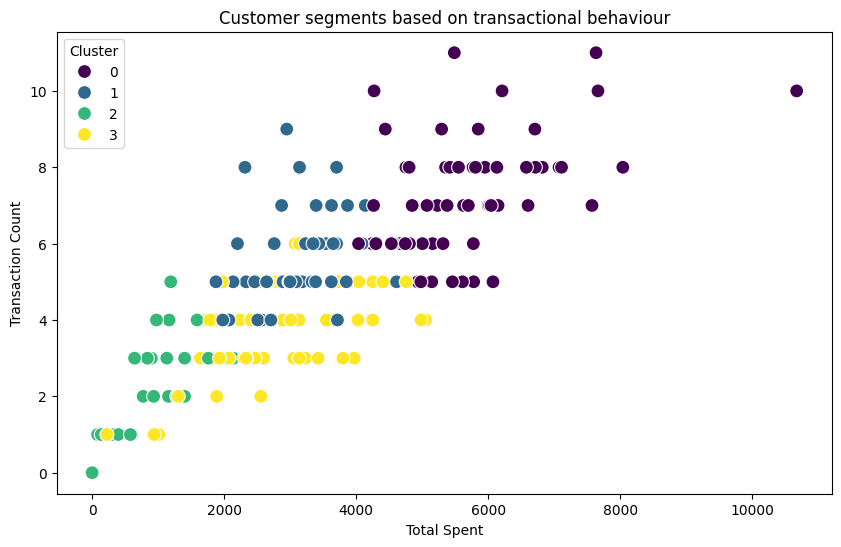

In [12]:
# visualization of cluster
plt.figure(figsize=(10,6))
sns.scatterplot(
    x=customer_data['total_spent'],
    y=customer_data['transaction_count'],
    hue=customer_data['Cluster'],
    palette='viridis',
    s=100
)
plt.title("Customer segments based on transactional behaviour")
plt.xlabel("Total Spent")
plt.ylabel("Transaction Count")
plt.legend(title="Cluster")
plt.show()

In [13]:
# Saving he clustering results
customer_data[['CustomerID','Cluster']].to_csv("Data/Customer_Cluster.csv",index=False)